# Denoising by Delaunay triangulation on zeros

In [5]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.method_delaunay_triangulation import delaunay_triangulation_denoising

In [6]:
np.random.seed(0)
# signal parameters
SNRin = 10
N = 2**9

sbank = SignalBank(N=N)
# s = sbank.signal_linear_chirp()
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_double_cos_chirp()


In [7]:
signal = add_snr(s,SNRin)
Nfft = 2*N
g,T = get_round_window(Nfft)
Lx = Nfft/T
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
output = delaunay_triangulation_denoising(signal, return_dic = True)
s_r, mask, tri, tri_select, zeros = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )
print("QRF={}".format(10*np.log10((np.sum(s**2))/(np.sum((s-s_r)**2)))))

QRF=6.972999322718469


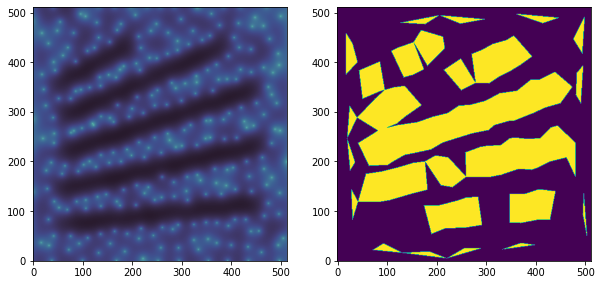

In [8]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
plt.show()